# 2600 ML Final Challenge

Team :
- Marc Vialatte - marc.vialatte@ecole2600.com
- Simon Bignolles - simon.bignolles@ecole2600.com
- Lucas Doremus - lucas.doremus@ecole2600.com

In [39]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [40]:
# Importation des données
train_dataframe = pd.read_csv('../res/train_dataset.csv')
test_dataframe = pd.read_csv('../res/test_dataset.csv')

In [41]:
train_dataframe.head()

,sha256,md5,label,numstrings,printables,entropy,paths,urls,registry,MZ,...,subsystem,major_image_version,minor_image_version,major_operating_system_version,minor_operating_system_version,sizeof_code,sizeof_headers,entry,imports,exports
0,e42b75fa32c93b75d370d61c947098cabd8bf1dd55a5ee...,e2dbe348a6370f586fab7e9568ccdabe,0,331,7043,5.334609,2,20,0,2,...,WINDOWS_CUI,0,0,4,0,9728,512,.text,mscr__CrDllMn,NaN
1,2fc6d5fc12addf0259afe57b22e510318a84274a1e8680...,ee0f8c6df3cc07c6c3d35ec5b32ffe8b,1,433,3215,6.469070,0,0,0,4,...,WINDOWS_GUI,0,0,5,0,0,4096,.text,CMDLG32_PgStpDlgW|ntdll_mmcpy|ntdll_mmst|ntdll...,NaN
2,10792606fc063281ff2ae288cdbdb77675fd10777278ec...,614dce4e17952b1f886848021bd56645,0,308,6165,5.618080,0,26,0,2,...,WINDOWS_GUI,0,0,5,0,19456,1024,.text,MSVCR90_strchr|MSVCR90_strcmp|MSVCR90__vsnprnt...,?fnJsonDll@@YAHXZ|json_object_array_add|json_o...
3,0bfb3803ee117aed607150084201cf5626257a2fc8bae6...,5fef689041958f6b08550e5a8a569048,1,806,6130,5.740129,0,0,0,3,...,WINDOWS_GUI,0,0,5,0,15360,1024,.text,PWRPRF_GtCrrntPwrPlcs|SR32_GtCrsrnf|SR32_PstMs...,NaN
4,004575d622dfdb7e2904d5b182089ab3c9fa7ce193746d...,b6dc84da891d6b2360d996244626a436,1,5818,1399909,5.011869,0,9,0,11,...,WINDOWS_GUI,0,0,4,0,443392,1024,CODE,krnl32_DltCrtclSctn|krnl32_TlsStVl|krnl32_lstr...,NaN


In [42]:
train_dataframe.isna().sum()

sha256                                 0
md5                                    0
label                                  0
numstrings                             0
printables                             0
entropy                                0
paths                                  0
urls                                   0
registry                               0
MZ                                     0
size                                   0
vsize                                  0
has_debug                              0
has_relocations                        0
has_resources                          0
has_signature                          0
has_tls                                0
symbols                                0
subsystem                              0
major_image_version                    0
minor_image_version                    0
major_operating_system_version         0
minor_operating_system_version         0
sizeof_code                            0
sizeof_headers  

In [43]:
train_dataframe['label'].sum()

255000

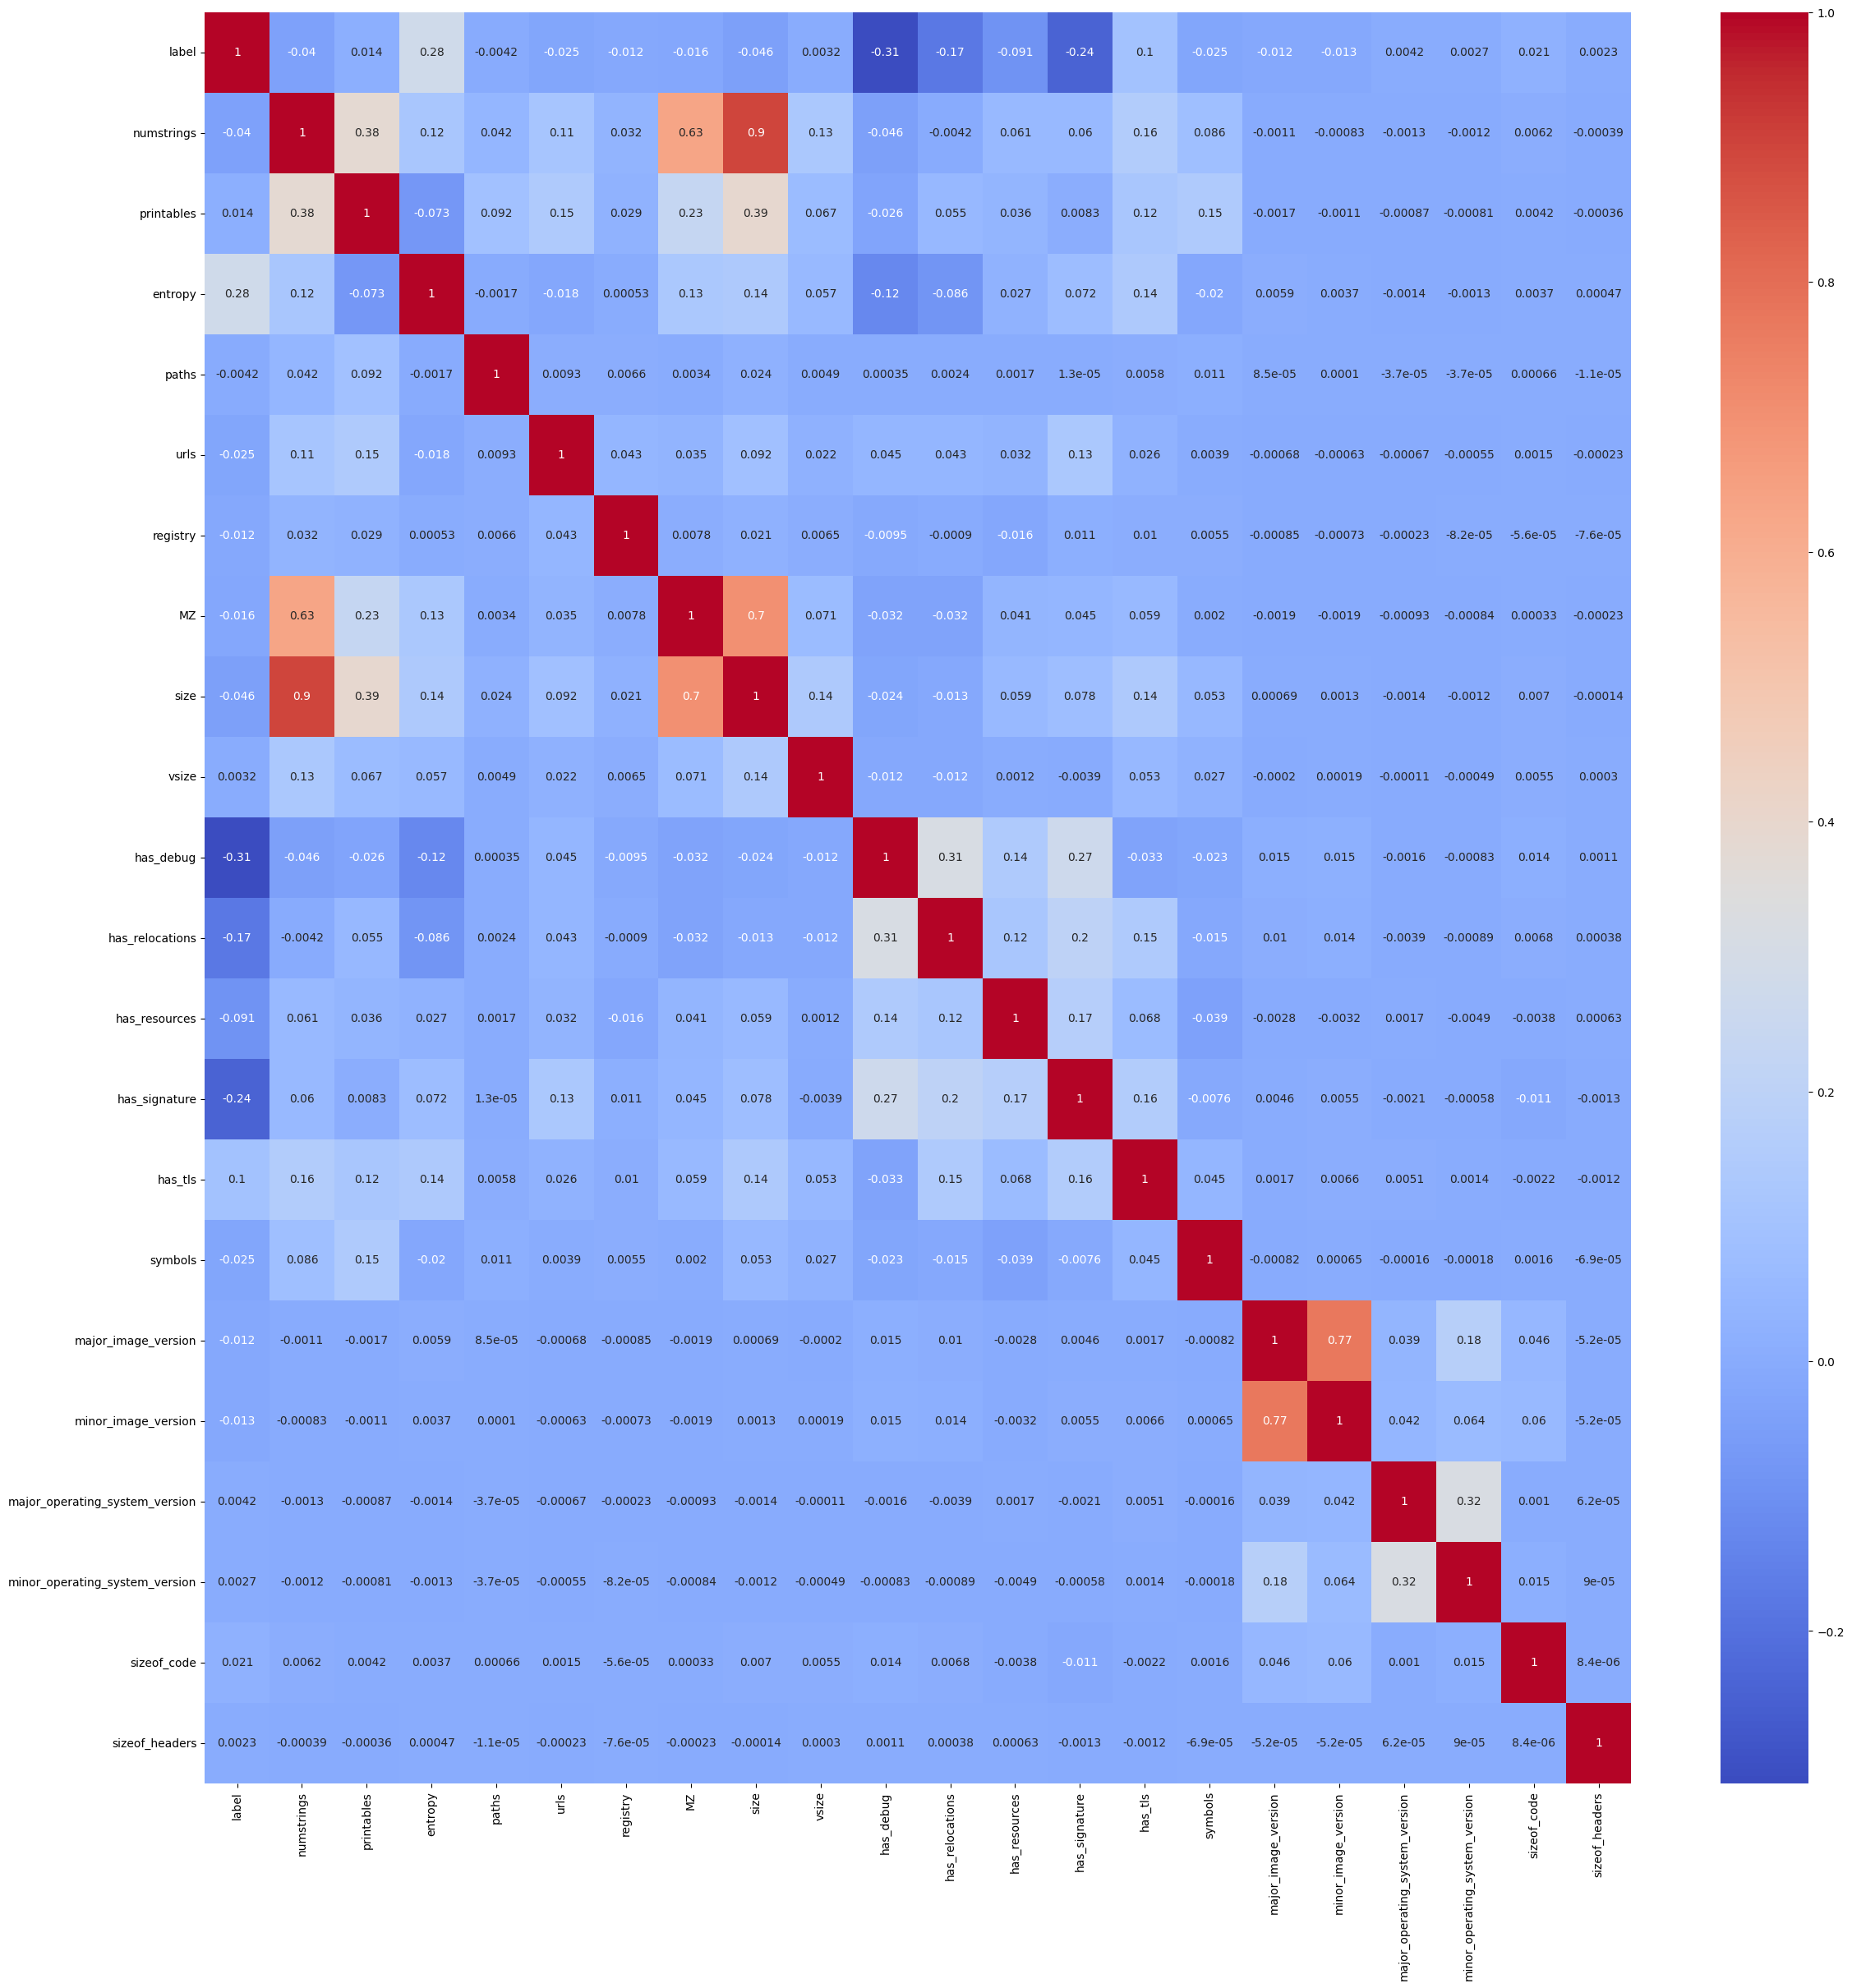

In [44]:
# Visualisation de la corrélation avec la variable label
train_dataframe_numeric = train_dataframe.select_dtypes(include = [np.number])
plt.figure(figsize=(28,28))
sns.heatmap(train_dataframe_numeric.corr(),cmap='coolwarm',annot = True)
plt.show()

In [45]:
print('Correlation avec la variable Label:'), print(train_dataframe_numeric.corr()['label'].sort_values(ascending = False))

Correlation avec la variable Label:
label                             1.000000
entropy                           0.279088
has_tls                           0.099956
sizeof_code                       0.021150
printables                        0.013899
major_operating_system_version    0.004172
vsize                             0.003226
minor_operating_system_version    0.002683
sizeof_headers                    0.002298
paths                            -0.004152
major_image_version              -0.012227
registry                         -0.012444
minor_image_version              -0.013042
MZ                               -0.015724
symbols                          -0.024739
urls                             -0.024780
numstrings                       -0.040173
size                             -0.045991
has_resources                    -0.091470
has_relocations                  -0.174835
has_signature                    -0.244733
has_debug                        -0.312944
Name: label, dtype

(None, None)

In [46]:
# Visualisation de la corrélation avec la variable label
train_dataframe_numeric['entropy_debug'] = train_dataframe['entropy'] * train_dataframe['has_debug']
train_dataframe_numeric['entropy_signature'] = train_dataframe['entropy'] * train_dataframe['has_signature']
train_dataframe_numeric['debug_signature'] = train_dataframe['has_debug'] * train_dataframe['has_signature']
print(train_dataframe_numeric.corr()['label'].sort_values(ascending = False))
train_dataframe_numeric.head()

label                             1.000000
entropy                           0.279088
has_tls                           0.099956
sizeof_code                       0.021150
printables                        0.013899
major_operating_system_version    0.004172
vsize                             0.003226
minor_operating_system_version    0.002683
sizeof_headers                    0.002298
paths                            -0.004152
major_image_version              -0.012227
registry                         -0.012444
minor_image_version              -0.013042
MZ                               -0.015724
symbols                          -0.024739
urls                             -0.024780
numstrings                       -0.040173
size                             -0.045991
has_resources                    -0.091470
has_relocations                  -0.174835
debug_signature                  -0.231895
entropy_signature                -0.235387
has_signature                    -0.244733
entropy_deb

,label,numstrings,printables,entropy,paths,urls,registry,MZ,size,vsize,...,symbols,major_image_version,minor_image_version,major_operating_system_version,minor_operating_system_version,sizeof_code,sizeof_headers,entropy_debug,entropy_signature,debug_signature
0,0,331,7043,5.334609,2,20,0,2,28456,40960,...,0,0,0,4,0,9728,512,0.000000,5.334609,0
1,1,433,3215,6.469070,0,0,0,4,139264,143360,...,0,0,0,5,0,0,4096,6.469070,0.000000,0
2,0,308,6165,5.618080,0,26,0,2,40672,40960,...,0,0,0,5,0,19456,1024,5.618080,5.618080,1
3,1,806,6130,5.740129,0,0,0,3,169456,188416,...,0,0,0,5,0,15360,1024,5.740129,0.000000,0
4,1,5818,1399909,5.011869,0,9,0,11,2261013,1912832,...,0,0,0,4,0,443392,1024,0.000000,0.000000,0


In [47]:
# Encodage de la variable subsystem
train_dataframe_cat = train_dataframe[['subsystem']]
ordinal_encoder = OrdinalEncoder()

train_dataframe_cat_encoded = ordinal_encoder.fit_transform(train_dataframe_cat)

In [48]:
ordinal_encoder.categories_

[array(['???', 'EFI_APPLICATION', 'EFI_BOOT_SERVICE_DRIVER',
        'EFI_RUNTIME_DRIVER', 'NATIVE', 'POSIX_CUI', 'UNKNOWN',
        'WINDOWS_BOOT_APPLICATION', 'WINDOWS_CE_GUI', 'WINDOWS_CUI',
        'WINDOWS_GUI', 'XBOX'], dtype=object)]

In [49]:
train_dataframe_numeric['subsystem'] = train_dataframe_cat_encoded

In [50]:
train_dataframe_numeric_no_label = train_dataframe_numeric.drop(['label'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(train_dataframe_numeric_no_label,train_dataframe['label'],test_size=0.2)


In [51]:
# Création du modèle
model = RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [52]:
# Evaluation du modèle
predictions = model.predict(x_test)
print(y_test.sum())
print(predictions.sum())

50913
50299


In [53]:
print(accuracy_score(y_test,predictions))

0.9584705882352941


In [54]:
test_dataframe_numeric = test_dataframe.select_dtypes(include = [np.number])
test_dataframe_numeric['entropy_debug'] = test_dataframe['entropy'] * test_dataframe['has_debug']
test_dataframe_numeric['entropy_signature'] = test_dataframe['entropy'] * test_dataframe['has_signature']
test_dataframe_numeric['debug_signature'] = test_dataframe['has_debug'] * test_dataframe['has_signature']
test_dataframe_cat = test_dataframe[['subsystem']]
ordinal_encoder = OrdinalEncoder()

test_dataframe_cat_encoded = ordinal_encoder.fit_transform(test_dataframe_cat)
test_dataframe_numeric['subsystem'] = test_dataframe_cat_encoded

In [55]:
predictions_test = model.predict(test_dataframe_numeric)

In [56]:
print(predictions_test.sum())

44463


In [57]:
results = pd.DataFrame({'ID': test_dataframe.index, 'label': predictions_test})
results.to_csv('predictions.csv', index=False)

# Charger le fichier "sample.csv" qui contient les ID corrects
sample_data = pd.read_csv('../res/sample.csv')
# Remplacer la colonne "id" dans les résultats par celle du fichier "sample.csv"
results['ID'] = sample_data['ID']

# Sauvegarder les résultats finaux avec les ID corrects au format CSV
results.to_csv('predictions.csv', index=False)

## 1. Quels modèles avez-vous testés ? Expliquer.

Nous avons testé RandomForestClassifier, qui est un choix courant pour les problèmes de classification en raison de sa robustesse et de sa capacité à gérer des ensembles de données complexes. 

## 2. Quel modèle avez-vous utilisé dans votre soumission finale ? Pourquoi ?

Nous avons sélectionner le modèle par rapport à ce qu'il nous semblé le plus pertinent pour notre ensemble de données.

RandomForestClassifier à pour capacité à gérer efficacement les données hétérogènes
RandomForestClassifier peu résoudre des problèmes de régression (variable cible numérique) et de classification (variable cible catégorique). 
RandomForestClassifier utilise une méthode d'ensemble, ce qui signifie qu'elles combinent les prédictions d'autres modèles.

## 3. Quels hyperparamètres associés au modèle final avez vous utilisé ?

Nous avons essayer utilisé ces hyperparamètres :

- `n_estimators=300`: Le nombre d'arbres dans la forêt. Nous avons choisi une valeur raisonnable pour équilibrer la performance et le coût de calcul.
- `random_state=42`: Pour assurer la reproductibilité des résultats, en fixant la graine aléatoire.

Ces valeurs ont été choisies après des expérimentations et des ajustements pour garantir une bonne performance sans surajustement excessif.

Etant sur des Toaster le temps de traitement ne sais jamais fini / (ou sinon on à fais quelque chose de mal mais on sais pas quoi)

## 4. Quelles variables ont le plus d'influence dans votre prédiction ?

Pour identifier les variables les plus influentes dans la prédiction, nous avons utilisé la fonction corr() de pandas.Cela attribut un score à chaque variable allant de 1 à -1. Les variables avec des scores éloignés de 0 sont considérées comme plus influentes dans la prédiction.

D'après les correlations ci-dessous, 4 variables sortent du lot:
- entropy
- subsytem
- has_debug
- has_signature

(Les variables entropy_debug, entropy_signature et debug_signature n'étant pas dans le dataset original)

In [60]:
print('Correlation avec la variable Label:'), print(train_dataframe_numeric.corr()['label'].sort_values(ascending = False))

Correlation avec la variable Label:
label                             1.000000
entropy                           0.279088
subsystem                         0.247320
has_tls                           0.099956
sizeof_code                       0.021150
printables                        0.013899
major_operating_system_version    0.004172
vsize                             0.003226
minor_operating_system_version    0.002683
sizeof_headers                    0.002298
paths                            -0.004152
major_image_version              -0.012227
registry                         -0.012444
minor_image_version              -0.013042
MZ                               -0.015724
symbols                          -0.024739
urls                             -0.024780
numstrings                       -0.040173
size                             -0.045991
has_resources                    -0.091470
has_relocations                  -0.174835
debug_signature                  -0.231895
entropy_signature 

(None, None)




## 5. Comment avez-vous géré la liste des imports et des exports ?

Nous avons fait le choix de ne pas utiliser les listes d'imports et d'exports car trop complexes à utiliser (encodage correct, etc), nous avons essayer avec un labelEncoder mais sans succès en raison d'un trop grand nombre de valeurs différentes (contrairement a subsytem par exemple).

## 6. L'utilisation de l'accuracy pour évaluer votre modèle fait-elle sens ? Pourquoi ?

L'utilisation de l'accuracy comme métrique d'évaluation a du sens dans notre cas, car notre problème est de l'ordre de la classification et semble être équilibré. Nous cherchons à maximiser le nombre de prédictions correctes globales. Cependant, nous devons également être conscients des limites de l'accuracy, en particulier si notre ensemble de données présente un déséquilibre entre les classes. Dans de tels cas, d'autres métriques d'évaluation peuvent être nécessaires pour une compréhension plus approfondie de la performance du modèle.

##    Quelle autre métrique d'évaluation auriez-vous pu utiliser ? Expliquer.

Une métrique alternative que nous aurions pu utiliser est l'AUC-ROC. Cette métrique est particulièrement pertinente lorsque l'équilibre entre les classes est crucial. Elle évalue la capacité du modèle à discriminer entre les classes, même en tenant compte du déséquilibre. Cela aurait fourni une perspective plus complète de la performance du modèle, en particulier dans des scénarios où la sensibilité et la spécificité sont cruciales.
L’aire sous la courbe ROC est donc un indicateur de la performance globale du modèle.

## 7. Afficher la matrice de confusion et expliquer vos résultats.

Afficher la matrice de confusion nous permet de visualiser les performances du modèle en termes de vrais positifs, vrais négatifs, faux positifs et faux négatifs. En interprétant cette matrice, nous pouvons évaluer la précision, le rappel et d'autres métriques de performance. Les résultats de la matrice de confusion nous aident à comprendre les erreurs spécifiques que le modèle commet, ce qui peut orienter d'éventuelles améliorations ou ajustements du modèle.

La matrice de confusion ci dessous est représentative de l'accuracy de notre modele, on le remarque bien par la diagonale (en bleu) qui contient la quasi-totalité des valeurs de notre entrainement.


<Axes: >

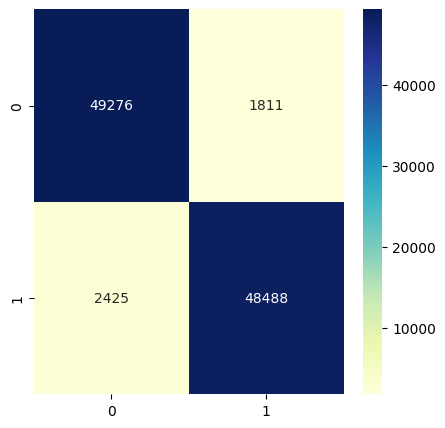

In [59]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True,fmt='.10g', cmap="YlGnBu")